Bench_mark results

In [1]:
!pip install numdifftools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 2.5 MB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numdifftools as nd

In [3]:
def polynomial_ansatz( t ):
  w1 = 0.1
  w2 = 0.5
  a3 = 10.0
  a4 = -15.0
  a5 = 6.0
  tau = 2
  return w1 + (w2 - w1)*( a3*((t/tau)**3) + a4*((t/tau)**4) + a5*((t/tau)**5) )
# polynomial_ansatz(w1 , w2 , a3 , a4 , a5 , t)

In [4]:
t_val = np.arange(0,2,0.01)
w_val = []
for t in t_val:
  w_val.append(polynomial_ansatz( t ))
w_val = np.array(w_val)

In [5]:
df_polynomial_ansatz = nd.Derivative(polynomial_ansatz, n=1)
dw_val = df_polynomial_ansatz(t_val)

In [6]:
ddf_polynomial_ansatz = nd.Derivative(polynomial_ansatz, n=2)
ddw_val = ddf_polynomial_ansatz(t_val)

In [7]:
t_val_normalized = []
for i in t_val:
  t_val_normalized.append(i/2)
t_val_normalized = np.array(t_val_normalized)

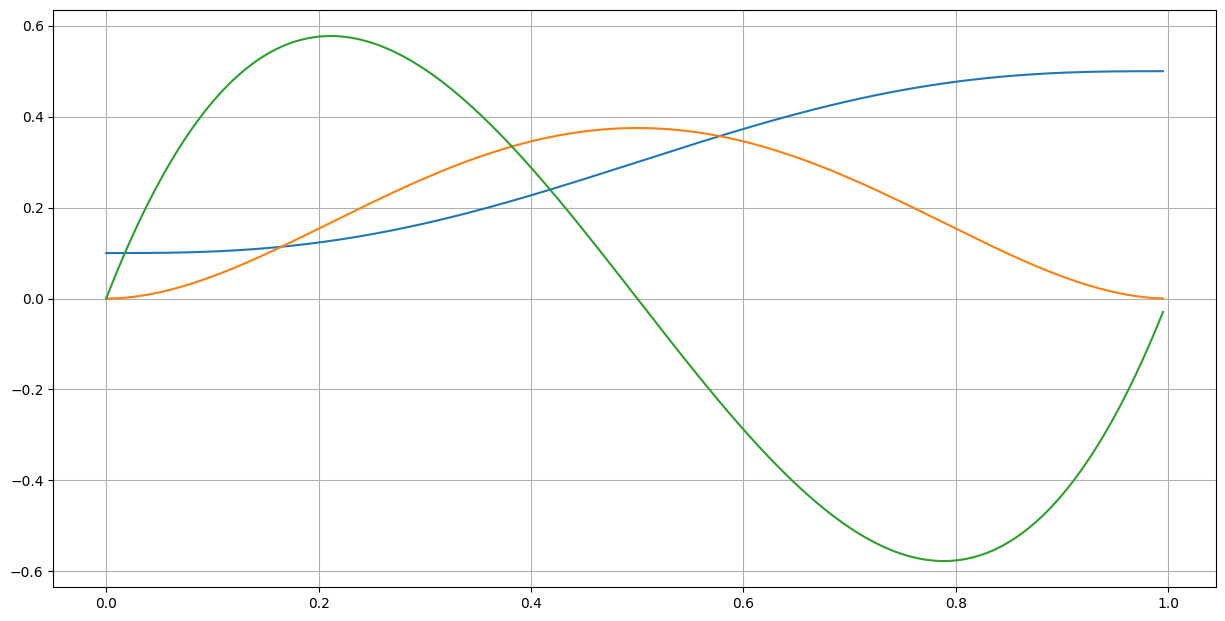

In [8]:
plt.figure(figsize=(15,7.5))
plt.grid(True)
plt.plot(t_val_normalized,w_val)
plt.plot(t_val_normalized,dw_val)
plt.plot(t_val_normalized,ddw_val)

In [9]:
def lcd_freq(w , w_1, w_2):
  return w**2 - ( 3*( (w_1)**2 )/( 4*( (w)**2 ) ) ) + ( w_2 / (2*w) )

In [10]:
lcd_freq_val = []
for i in range(t_val.shape[0]):
  lcd_freq_val.append( ( lcd_freq( w_val[i] , dw_val[i] , ddw_val[i] ) )**0.5 )
lcd_freq_val = np.array(lcd_freq_val)

<ipython-input-10-4cf6b607e9a2>:3: RuntimeWarning: invalid value encountered in double_scalars
  lcd_freq_val.append( ( lcd_freq( w_val[i] , dw_val[i] , ddw_val[i] ) )**0.5 )


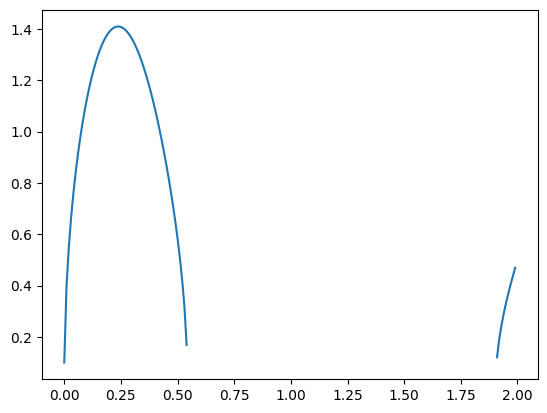

In [ ]:
plt.plot(t_val,lcd_freq_val)

Neural network implementation

In [ ]:
def init_params():
  W1 = np.random.rand(1 , 100) - 0.5
  W2 = np.random.rand(100, 100) - 0.5
  W3 = np.random.rand(100, 100) -0.5
  W4 = np.random.rand(100, 1) - 0.5
  b1 = np.random.rand(100, 1) - 0.5
  b2 = np.random.rand(100, 1) - 0.5
  b3 = np.random.rand(100, 1) -0.5
  b4 = np.random.rand(1,1) - 0.5
  return W1, W2, W3, W4, b1, b2, b3, b4,

def reLU(val):
  return np.maximum(0, val)

def sigmoid(val_array):
  for i in range(val_array.shape[0]):
    val_array[i][0] = 1/(1+np.exp(-val_array[i][0]))
  return val_array
def forward_propogation(t, W1, W2, W3, W4, b1, b2, b3, b4):
  layer1 =  sigmoid(np.add(np.matmul(t,W1).transpose() , b1))
  layer2 =  sigmoid(np.add(np.matmul(layer1.transpose(),W2).transpose() , b2))
  layer3 =  sigmoid(np.add(np.matmul(layer2.transpose(),W3).transpose() , b3))
  output =  sigmoid(np.add(np.matmul(layer3.transpose(),W4).transpose() , b4))

def loss_function():

def auto_derivative():

def adam_optimizatoin(parameters, grads, v, s, t, learning_rate = 0.01,
                                beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8):


    L = len(parameters) // 2                 # number of layers in the neural networks
    v_corrected = {}                         # Initializing first moment estimate, python dictionary
    s_corrected = {}                         # Initializing second moment estimate, python dictionary

    # Perform Adam update on all parameters
    for l in range(L):
        # Moving average of the gradients. Inputs: "v, grads, beta1". Output: "v".
        v["dW" + str(l+1)] = beta1 * v["dW" + str(l+1)] + (1 - beta1) * grads["dW" + str(l+1)]
        v["db" + str(l+1)] = beta1 * v["db" + str(l+1)] + (1 - beta1) * grads["db" + str(l+1)]

        # Compute bias-corrected first moment estimate. Inputs: "v, beta1, t". Output: "v_corrected".
        v_corrected["dW" + str(l+1)] = v["dW" + str(l+1)] /(1 - beta1 ** t)
        v_corrected["db" + str(l+1)] = v["db" + str(l+1)] /(1 - beta1 ** t)

        # Moving average of the squared gradients. Inputs: "s, grads, beta2". Output: "s".
        s["dW" + str(l+1)] = beta2 * s["dW" + str(l+1)] + (1 - beta2) * (np.square(grads["dW" + str(l+1)]) )
        s["db" + str(l+1)] = beta2 * s["db" + str(l+1)] + (1 - beta2) * (np.square(grads["db" + str(l+1)]) )

        # Compute bias-corrected second raw moment estimate. Inputs: "s, beta2, t". Output: "s_corrected".
        s_corrected["dW" + str(l+1)] = s["dW" + str(l+1)] /(1 - beta2 ** t)
        s_corrected["db" + str(l+1)] = s["db" + str(l+1)] /(1 - beta2 ** t)

        # Update parameters. Inputs: "parameters, learning_rate, v_corrected, s_corrected, epsilon". Output: "parameters".
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate *  v_corrected["dW" + str(l+1)] /(np.sqrt(s_corrected["dW" + str(l+1)]) + epsilon)
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * v_corrected["db" + str(l+1)] / (np.sqrt(s_corrected["db" + str(l+1)]) + epsilon)

    return parameters, v, s

SyntaxError: ignored

In [ ]:

def _get_params(value):
    if isinstance(value, Parameter):
        return [value]
    if isinstance(value, dict):
        params = []
        for k, v in value.items():
            params += _get_params(v)
        return params
    if isinstance(value, Module):
        return value.parameters()
    return []

class Module:
    def parameters(self):
        return _get_params(self.__dict__)

    def __call__(self, *args, **kwargs):
        return self.forward(*args, **kwargs)

In [ ]:
"""Core data structures."""
import needle
from typing import List, Optional, NamedTuple, Tuple, Union
from collections import namedtuple
import numpy

# needle version
LAZY_MODE = False
TENSOR_COUNTER = 0

# NOTE: we will numpy as the array_api
# to backup our computations, this line will change in later homeworks
import numpy as array_api

NDArray = numpy.ndarray


class Device:
    """Indicates the device supporting an NDArray."""


class CPUDevice(Device):
    """Represents data that sits in CPU"""

    def __repr__(self):
        return "needle.cpu()"

    def __hash__(self):
        return self.__repr__().__hash__()

    def __eq__(self, other):
        return isinstance(other, CPUDevice)

    def enabled(self):
        return True


def cpu():
    """Return cpu device"""
    return CPUDevice()


def all_devices():
    """return a list of all available devices"""
    return [cpu()]


class Op:
    """Operator definition."""

    def __call__(self, *args):
        raise NotImplementedError()

    def compute(self, *args: Tuple[NDArray]):
        """Calculate forward pass of operator.

        Parameters
        ----------
        input: np.ndarray
            A list of input arrays to the function

        Returns
        -------
        output: nd.array
            Array output of the operation

        """
        raise NotImplementedError()

    def gradient(
        self, out_grad: "Value", node: "Value"
    ) -> Union["Value", Tuple["Value"]]:
        """Compute partial adjoint for each input value for a given output adjoint.

        Parameters
        ----------
        out_grad: Value
            The adjoint wrt to the output value.

        node: Value
            The value node of forward evaluation.

        Returns
        -------
        input_grads: Value or Tuple[Value]
            A list containing partial gradient adjoints to be propagated to
            each of the input node.
        """
        raise NotImplementedError()

    def gradient_as_tuple(self, out_grad: "Value", node: "Value") -> Tuple["Value"]:
        """ Convenience method to always return a tuple from gradient call"""
        output = self.gradient(out_grad, node)
        if isinstance(output, tuple):
            return output
        elif isinstance(output, list):
            return tuple(output)
        else:
            return (output,)


class TensorOp(Op):
    """ Op class specialized to output tensors, will be alterate subclasses for other structures """

    def __call__(self, *args):
        return Tensor.make_from_op(self, args)


class Value:
    """A value in the computational graph."""

    # trace of computational graph
    op: Optional[Op]
    inputs: List["Value"]
    # The following fields are cached fields for
    # dynamic computation
    cached_data: NDArray
    requires_grad: bool

    def realize_cached_data(self):
        """Run compute to realize the cached data"""
        # avoid recomputation
        if self.cached_data is not None:
            return self.cached_data
        # note: data implicitly calls realized cached data
        self.cached_data = self.op.compute(
            *[x.realize_cached_data() for x in self.inputs]
        )
        self.cached_data
        return self.cached_data

    def is_leaf(self):
        return self.op is None

    def __del__(self):
        global TENSOR_COUNTER
        TENSOR_COUNTER -= 1

    def _init(
        self,
        op: Optional[Op],
        inputs: List["Tensor"],
        *,
        num_outputs: int = 1,
        cached_data: List[object] = None,
        requires_grad: Optional[bool] = None
    ):
        global TENSOR_COUNTER
        TENSOR_COUNTER += 1
        if requires_grad is None:
            requires_grad = any(x.requires_grad for x in inputs)
        self.op = op
        self.inputs = inputs
        self.num_outputs = num_outputs
        self.cached_data = cached_data
        self.requires_grad = requires_grad

    @classmethod
    def make_const(cls, data, *, requires_grad=False):
        value = cls.__new__(cls)
        value._init(
            None,
            [],
            cached_data=data,
            requires_grad=requires_grad,
        )
        return value

    @classmethod
    def make_from_op(cls, op: Op, inputs: List["Value"]):
        value = cls.__new__(cls)
        value._init(op, inputs)

        if not LAZY_MODE:
            if not value.requires_grad:
                return value.detach()
            value.realize_cached_data()
        return value


### Not needed in HW1
class TensorTuple(Value):
    """Represent a tuple of tensors.

    To keep things simple, we do not support nested tuples.
    """

    def __len__(self):
        cdata = self.realize_cached_data()
        return len(cdata)

    def __getitem__(self, index: int):
        return needle.ops.tuple_get_item(self, index)

    def tuple(self):
        return tuple([x for x in self])

    def __repr__(self):
        return "needle.TensorTuple" + str(self.tuple())

    def __str__(self):
        return self.__repr__()

    def __add__(self, other):
        assert isinstance(other, TensorTuple)
        assert len(self) == len(other)
        return needle.ops.make_tuple(*[self[i] + other[i] for i in range(len(self))])

    def detach(self):
        """Create a new tensor that shares the data but detaches from the graph."""
        return Tuple.make_const(self.realize_cached_data())


class Tensor(Value):
    grad: "Tensor"

    def __init__(
        self,
        array,
        *,
        device: Optional[Device] = None,
        dtype=None,
        requires_grad=True,
        **kwargs
    ):
        if isinstance(array, Tensor):
            if device is None:
                device = array.device
            if dtype is None:
                dtype = array.dtype
            if device == array.device and dtype == array.dtype:
                cached_data = array.realize_cached_data()
            else:
                # fall back, copy through numpy conversion
                cached_data = Tensor._array_from_numpy(
                    array.numpy(), device=device, dtype=dtype
                )
        else:
            device = device if device else cpu()
            cached_data = Tensor._array_from_numpy(array, device=device, dtype=dtype)

        self._init(
            None,
            [],
            cached_data=cached_data,
            requires_grad=requires_grad,
        )

    @staticmethod
    def _array_from_numpy(numpy_array, device, dtype):
        if array_api is numpy:
            return numpy.array(numpy_array, dtype=dtype)
        return array_api.array(numpy_array, device=device, dtype=dtype)

    @staticmethod
    def make_from_op(op: Op, inputs: List["Value"]):
        tensor = Tensor.__new__(Tensor)
        tensor._init(op, inputs)
        if not LAZY_MODE:
            tensor.realize_cached_data()
        return tensor

    @staticmethod
    def make_const(data, requires_grad=False):
        tensor = Tensor.__new__(Tensor)
        tensor._init(
            None,
            [],
            cached_data=data
            if not isinstance(data, Tensor)
            else data.realize_cached_data(),
            requires_grad=requires_grad,
        )
        return tensor

    @property
    def data(self):
        return self.detach()

    @data.setter
    def data(self, value):
        assert isinstance(value, Tensor)
        assert value.dtype == self.dtype, "%s %s" % (
            value.dtype,
            self.dtype,
        )
        self.cached_data = value.realize_cached_data()

    def detach(self):
        """Create a new tensor that shares the data but detaches from the graph."""
        return Tensor.make_const(self.realize_cached_data())

    @property
    def shape(self):
        return self.realize_cached_data().shape

    @property
    def dtype(self):
        return self.realize_cached_data().dtype

    @property
    def device(self):
        data = self.realize_cached_data()
        # numpy array always sits on cpu
        if array_api is numpy:
            return cpu()
        return data.device

    def backward(self, out_grad=None):
        out_grad = out_grad if out_grad else Tensor(numpy.ones(self.shape))
        compute_gradient_of_variables(self, out_grad)

    def __repr__(self):
        return "needle.Tensor(" + str(self.realize_cached_data()) + ")"

    def __str__(self):
        return self.realize_cached_data().__str__()

    def numpy(self):
        data = self.realize_cached_data()
        if array_api is numpy:
            return data
        return data.numpy()

    def __add__(self, other):
        if isinstance(other, Tensor):
            return needle.ops.EWiseAdd()(self, other)
        else:
            return needle.ops.AddScalar(other)(self)

    def __mul__(self, other):
        if isinstance(other, Tensor):
            return needle.ops.EWiseMul()(self, other)
        else:
            return needle.ops.MulScalar(other)(self)

    def __pow__(self, other):
        ### BEGIN YOUR SOLUTION
        raise NotImplementedError()
        ### END YOUR SOLUTION

    def __sub__(self, other):
        if isinstance(other, Tensor):
            return needle.ops.EWiseAdd()(self, needle.ops.Negate()(other))
        else:
            return needle.ops.AddScalar(-other)(self)

    def __truediv__(self, other):
        if isinstance(other, Tensor):
            return needle.ops.EWiseDiv()(self, other)
        else:
            return needle.ops.DivScalar(other)(self)

    def __matmul__(self, other):
        return needle.ops.MatMul()(self, other)

    def matmul(self, other):
        return needle.ops.MatMul()(self, other)

    def sum(self, axes=None):
        return needle.ops.Summation(axes)(self)

    def broadcast_to(self, shape):
        return needle.ops.BroadcastTo(shape)(self)

    def reshape(self, shape):
        return needle.ops.Reshape(shape)(self)

    def __neg__(self):
        return needle.ops.Negate()(self)

    def transpose(self, axes=None):
        return needle.ops.Transpose(axes)(self)

    __radd__ = __add__
    __rmul__ = __mul__
    __rsub__ = __sub__
    __rmatmul__ = __matmul__


def compute_gradient_of_variables(output_tensor, out_grad):
    """Take gradient of output node with respect to each node in node_list.

    Store the computed result in the grad field of each Variable.
    """
    # a map from node to a list of gradient contributions from each output node
    node_to_output_grads_list: Dict[Tensor, List[Tensor]] = {}
    # Special note on initializing gradient of
    # We are really taking a derivative of the scalar reduce_sum(output_node)
    # instead of the vector output_node. But this is the common case for loss function.
    node_to_output_grads_list[output_tensor] = [out_grad]

    # Traverse graph in reverse topological order given the output_node that we are taking gradient wrt.
    reverse_topo_order = list(reversed(find_topo_sort([output_tensor])))

    ### BEGIN YOUR SOLUTION
    raise NotImplementedError()
    ### END YOUR SOLUTION


def find_topo_sort(node_list: List[Value]) -> List[Value]:
    """Given a list of nodes, return a topological sort list of nodes ending in them.

    A simple algorithm is to do a post-order DFS traversal on the given nodes,
    going backwards based on input edges. Since a node is added to the ordering
    after all its predecessors are traversed due to post-order DFS, we get a topological
    sort.
    """
    ### BEGIN YOUR SOLUTION
    raise NotImplementedError()
    ### END YOUR SOLUTION


def topo_sort_dfs(node, visited, topo_order):
    """Post-order DFS"""
    ### BEGIN YOUR SOLUTION
    raise NotImplementedError()
    ### END YOUR SOLUTION


##############################
####### Helper Methods #######
##############################


def sum_node_list(node_list):
    """Custom sum function in order to avoid create redundant nodes in Python sum implementation."""
    from operator import add
    from functools import reduce

    return reduce(add, node_list)

In [ ]:
class MultiPathScaleAdd(Module):
    def __init__(self):
        self.path0 = ScaleAdd()
        self.path1 = ScaleAdd()

    def forward(self, x):
        return self.path0(x) + self.path1(x)

In [ ]:
x = np.random.rand(1 , 1)
y = np.random.rand(4 , 1)
one_array = np.array([[1], [1] , [1] , [1]])
x.shape  , y.shape , np.matmul(x,y.transpose()).transpose() + one_array

((1, 1),
 (4, 1),
 array([[1.39000899],
        [1.49170505],
        [1.27635822],
        [1.37524859]]))

In [ ]:
y = np.random.rand(4 , 1)
y

array([[0.24893689],
       [0.11700549],
       [0.22950921],
       [0.30328793]])

In [ ]:
x_1 = x-0.5

In [ ]:
x_1[0]

array([0.06996214])